In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import norm

In [3]:
# Function to validate and convert date input
def get_valid_date():
    while True:
        date_str = input("Enter the date you bought the asset (YYYY-MM-DD): ")
        try:
            date = datetime.strptime(date_str, "%Y-%m-%d")
            return date
        except ValueError:
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")

In [6]:
# Function to download stock data for a specific date
def get_asset_data(ticker, purchase_date):
    try:
        # Fetch historical data for a specific ticker
        data = yf.download(ticker, start=purchase_date, end=purchase_date + timedelta(days=1))
        
        if data.empty:
            return {"error": f"No data found for '{ticker}' on {purchase_date.date()}."}
        
        # Get the price on the purchase date
        purchase_price = data['Close'].iloc[0]  # Get closing price for that day
        return {"ticker": ticker, "purchase_date": purchase_date, "purchase_price": purchase_price}
    
    except Exception as e:
        return {"error": f"Error fetching data for {ticker}: {e}"}

In [26]:
# Function to handle asset entry based on asset type
def enter_asset_by_type(asset_type):
    assets = []

    if asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        assets_input = input(f"Enter {asset_type.lower()} tickers separated by commas: ").split(',')
        for asset in assets_input:
            asset = asset.strip().upper()
            start_date = get_valid_date()  # Get the purchase date from the user
            invested_amount = float(input(f"Enter the amount of money you invested in {asset}: "))

            # Fetch the asset data (price on purchase date)
            data = get_asset_data(asset, start_date)
            if "error" not in data:
                purchase_price = data["purchase_price"]

                # Calculate the number of units purchased (amount invested / price per unit at that time)
                units_purchased = invested_amount / purchase_price

                assets.append({
                    "type": asset_type,
                    "ticker": asset,
                    "start_date": start_date,
                    "invested_amount": invested_amount,
                    "purchase_price": purchase_price,
                    "units_purchased": units_purchased
                })
            else:
                print(data["error"])


    return assets

In [28]:
# Function to choose asset type
def choose_asset_type():
    portfolio = {"Stock": [], "Bond": [], "Fund": [], "Crypto": []}

    while True:
        print("\nAsset Types: Stock, Bond, Fund, Crypto")
        asset_type = input("Choose an asset type or type 'exit' to finish: ").capitalize()

        if asset_type == 'Exit':
            print("Exiting...")
            break
        elif asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
            assets = enter_asset_by_type(asset_type)
            if assets:
                portfolio[asset_type].extend(assets)
                print(f"\nYou entered the following {asset_type}(s):")
                for asset in assets:
                    print(asset)
        else:
            print("Invalid asset type. Please choose from Stock, Bond, Fund, or Crypto.")

    return portfolio

In [30]:
# Main execution starts here
if __name__ == "__main__":
    initial_multi_asset_portfolio = choose_asset_type()
    print("\nFinal Portfolio:")
    print(initial_multi_asset_portfolio)


Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  stock
Enter stock tickers separated by commas:  NVDA
Enter the date you bought the asset (YYYY-MM-DD):  2024-04-04
Enter the amount of money you invested in NVDA:  1000


[*********************100%***********************]  1 of 1 completed



You entered the following Stock(s):
{'type': 'Stock', 'ticker': 'NVDA', 'start_date': datetime.datetime(2024, 4, 4, 0, 0), 'invested_amount': 1000.0, 'purchase_price': 85.90499877929688, 'units_purchased': 11.640766127814674}

Asset Types: Stock, Bond, Fund, Crypto


Choose an asset type or type 'exit' to finish:  exit


Exiting...

Final Portfolio:
{'Stock': [{'type': 'Stock', 'ticker': 'NVDA', 'start_date': datetime.datetime(2024, 4, 4, 0, 0), 'invested_amount': 1000.0, 'purchase_price': 85.90499877929688, 'units_purchased': 11.640766127814674}], 'Bond': [], 'Fund': [], 'Crypto': []}


In [32]:
# Vitualization
import matplotlib.pyplot as plt

# Function to calculate initial investment proportions
def visualize_initial_investment(portfolio):
    labels = []
    sizes = []
    
    # Process Stock, Bond, Fund, and Gold investments
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        total_invested = sum(item['invested_amount'] for item in portfolio[asset_type])
        if total_invested > 0:
            labels.append(asset_type)
            sizes.append(total_invested)
    
    # Plot pie chart for initial investments
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Initial Investment Proportion')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [34]:
# Function to fetch the current price dynamically
def fetch_latest_price(ticker):
    try:
        # Download the last available data for today
        data = yf.download(ticker, period="1d")
        return data['Close'][-1]  # Return the last closing price
    except Exception as e:
        print(f"Error fetching latest price for {ticker}: {e}")
        return None

In [36]:
# Function to update portfolio with the latest prices
def update_portfolio_with_latest_prices(portfolio):
    updated_portfolio = {'Stock': [], 'Bond': [], 'Fund': [], 'Crypto': []}

    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        for asset in portfolio[asset_type]:
            latest_price = fetch_latest_price(asset['ticker'])  # Fetch the latest price
            if latest_price:
                updated_asset = {
                    'type': asset['type'],
                    'ticker': asset['ticker'],
                    'start_date': asset['start_date'],
                    'invested_amount': asset['invested_amount'],
                    'latest_price': latest_price,
                    'units_purchased': asset['units_purchased'],
                    'current_value': asset['units_purchased'] * latest_price
                }
                updated_portfolio[asset_type].append(updated_asset)
    
    return updated_portfolio

current_multi_asset_portfolio = update_portfolio_with_latest_prices(initial_multi_asset_portfolio)

[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_53896/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price


In [38]:
# Function to calculate current wealth proportions
def visualize_current_wealth(portfolio):
    labels = []
    sizes = []
    
    # Process Stock, Bond, Fund, and Gold wealth based on current price
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        total_wealth = 0
        for item in portfolio[asset_type]:
            latest_price = fetch_latest_price(item['ticker'])  # Fetch the latest price
            if latest_price:
                total_wealth += item['units_purchased'] * latest_price
        if total_wealth > 0:
            labels.append(asset_type)
            sizes.append(total_wealth)
    
    # Plot pie chart for current wealth
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Current Wealth Proportion')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

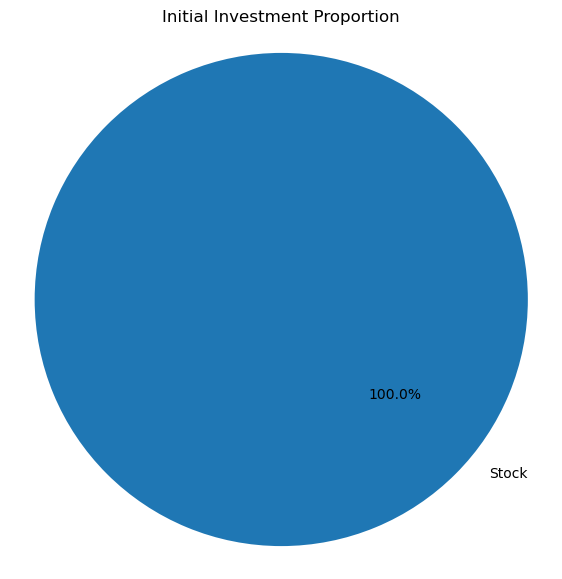

[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_53896/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price


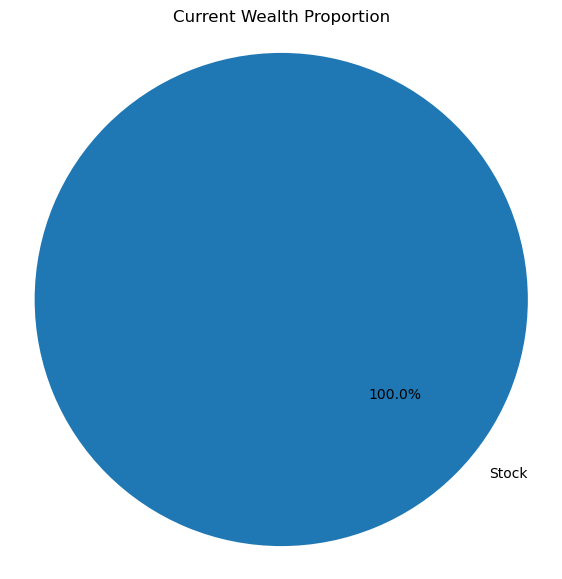

In [40]:
# Visualize initial investment proportion
visualize_initial_investment(initial_multi_asset_portfolio)

# Visualize current wealth proportion
visualize_current_wealth(current_multi_asset_portfolio)

In [45]:
# Function to calculate and print detailed portfolio performance
def print_portfolio_performance(portfolio):
    total_initial_value = 0
    total_current_value = 0
    
    print("\n=== Portfolio Performance ===")
    
    # Process Stocks, Bonds, Funds, and Gold
    for asset_type in ['Stock', 'Bond', 'Fund', 'Crypto']:
        asset_initial_value = 0
        asset_current_value = 0
        print(f"\n=== {asset_type} Performance ===")
        
        for asset in portfolio[asset_type]:
            initial_value = asset['invested_amount']
            latest_price = fetch_latest_price(asset['ticker'])  # Fetch the latest price
            if latest_price:
                current_value = asset['units_purchased'] * latest_price
                asset_initial_value += initial_value
                asset_current_value += current_value
                
                # Calculate percentage change and absolute change
                change_percentage = ((current_value - initial_value) / initial_value) * 100
                change_value = current_value - initial_value
                
                # Print individual asset performance including net worth
                print(f"{asset['ticker']}: {current_value:.2f} USD, {change_percentage:+.2f}% ({change_value:+.2f} USD)")
        
        # Calculate and print asset type performance
        if asset_initial_value > 0:
            asset_change_percentage = ((asset_current_value - asset_initial_value) / asset_initial_value) * 100
            asset_change_value = asset_current_value - asset_initial_value
            print(f"Total {asset_type}: {asset_current_value:.2f} USD, {asset_change_percentage:+.2f}% ({asset_change_value:+.2f} USD)")
        
        # Update portfolio totals
        total_initial_value += asset_initial_value
        total_current_value += asset_current_value
    
    # Calculate and print total portfolio performance
    total_change_percentage = ((total_current_value - total_initial_value) / total_initial_value) * 100
    total_change_value = total_current_value - total_initial_value
    print(f"\n=== Total Portfolio: {total_current_value:.2f} USD, {total_change_percentage:+.2f}% ({total_change_value:+.2f} USD) ===")

print_portfolio_performance(initial_multi_asset_portfolio)

[*********************100%***********************]  1 of 1 completed


=== Portfolio Performance ===

=== Stock Performance ===
NVDA: 1647.63 USD, +64.76% (+647.63 USD)
Total Stock: 1647.63 USD, +64.76% (+647.63 USD)

=== Bond Performance ===

=== Fund Performance ===

=== Crypto Performance ===

=== Total Portfolio: 1647.63 USD, +64.76% (+647.63 USD) ===



/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_53896/1881802631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price


In [51]:
def analyze_asset(ticker, target_year):
    try:
        end_date = datetime.now()
        start_date = end_date - timedelta(days=2000)

        # Fetch historical asset data
        asset_data = yf.download(ticker, start=start_date, end=end_date)
        asset_data.dropna(inplace=True)

        # Calculate log returns
        asset_data['LogReturn'] = np.log(asset_data['Close']).shift(-1) - np.log(asset_data['Close'])
        asset_data.dropna(inplace=True)

        # Calculate mean and standard deviation of log returns
        mu = asset_data['LogReturn'].mean()
        sigma = asset_data['LogReturn'].std(ddof=1)

        # Calculate the number of trading days until the end of the target year
        current_date = datetime.now()
        target_date = datetime(target_year, 12, 31)
        trading_days_until_target = (target_date - current_date).days * (252 / 365)  # approx 252 trading days per year

        # Adjust mu and sigma for the time horizon
        projected_mu = mu * trading_days_until_target
        projected_sigma = sigma * np.sqrt(trading_days_until_target)

        # Calculate percentage change range with 95% confidence
        z_score = norm.ppf(0.975)  # 95% confidence z-score
        pct_change_range = (projected_mu - z_score * projected_sigma, projected_mu + z_score * projected_sigma)
        pct_change_range_percent = (np.exp(pct_change_range[0]) - 1, np.exp(pct_change_range[1]) - 1)  # convert log returns to percentage

        print(f'The expected percentage change range with 95% confidence for {ticker} by {target_year} is {pct_change_range_percent}')
        
        return pct_change_range_percent

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [54]:
def analyze_portfolio(portfolio, target_year):
    asset_projections = []
    
    # Loop through all asset types in the portfolio
    for asset_type in portfolio:
        for asset in portfolio[asset_type]:
            ticker = asset['ticker']
            print(f"\nAnalyzing {asset_type[:-1]}: {ticker}")  # Display asset type without plural
            projection = analyze_asset(ticker, target_year)
            
            if projection is not None:
                asset_projections.append({
                    'ticker': ticker,
                    'pct_change_range': projection
                })
    
    return asset_projections

In [57]:
def compute_projected_value(current_value, pct_change_range):
    # Calculate the lower and upper bounds of the projected value using decimal format
    lower_bound = current_value * (1 + pct_change_range[0]/100)
    upper_bound = current_value * (1 + pct_change_range[1]/100)
    
    return lower_bound, upper_bound

In [60]:
def project_portfolio(portfolio, updated_portfolio, projections):
    projected_portfolio = updated_portfolio.copy()

    for asset_type in portfolio:
        for i, asset in enumerate(portfolio[asset_type]):
            ticker = asset['ticker']
            current_value = updated_portfolio[asset_type][i]['current_value']

            # Find the projection for the corresponding ticker
            for proj in projections:
                if proj['ticker'] == ticker:
                    pct_change_range = proj['pct_change_range']
                    projected_value_range = compute_projected_value(current_value, pct_change_range)

                    # Update the projected portfolio with the projected value range
                    projected_portfolio[asset_type][i]['projected_value_range'] = {
                        'lower_bound': projected_value_range[0],
                        'upper_bound': projected_value_range[1]
                    }
    
    return projected_portfolio

In [ ]:
def compute_projected_value(current_value, pct_change_range):
    # Calculate the lower and upper bounds of the projected value using decimal format
    lower_bound = current_value * (1 + pct_change_range[0]/100)
    upper_bound = current_value * (1 + pct_change_range[1]/100)
    
    return lower_bound, upper_bound

In [67]:
def project_portfolio(portfolio, updated_portfolio, projections):
    projected_portfolio = updated_portfolio.copy()

    for asset_type in portfolio:
        for i, asset in enumerate(portfolio[asset_type]):
            ticker = asset['ticker']
            current_value = updated_portfolio[asset_type][i]['current_value']

            # Find the projection for the corresponding ticker
            for proj in projections:
                if proj['ticker'] == ticker:
                    pct_change_range = proj['pct_change_range']
                    projected_value_range = compute_projected_value(current_value, pct_change_range)

                    # Update the projected portfolio with the projected value range
                    projected_portfolio[asset_type][i]['projected_value_range'] = {
                        'lower_bound': projected_value_range[0],
                        'upper_bound': projected_value_range[1]
                    }
    
    return projected_portfolio

In [72]:
#User inputs
target_year = int(input("Enter the year you want to analyze (e.g., 2028): "))

# Run portfolio analysis
pct_change_range = analyze_portfolio(initial_multi_asset_portfolio, target_year)

# Run portfolio projection
projected_multi_asset_portfolio = project_portfolio(initial_multi_asset_portfolio, current_multi_asset_portfolio, pct_change_range)

# Display the projected portfolio
for asset_type in projected_multi_asset_portfolio:
    for asset in projected_multi_asset_portfolio[asset_type]:
        print(f"Ticker: {asset['ticker']}")
        print(f"Current Value: {asset['current_value']}")
        print(f"Projected Value Range by {target_year}: {asset['projected_value_range']}")

Enter the year you want to analyze (e.g., 2028):  2028


[*********************100%***********************]  1 of 1 completed


Analyzing Stoc: NVDA
The expected percentage change range with 95% confidence for NVDA by 2028 is (0.763278453858288, 115.21544035619831)
Ticker: NVDA
Current Value: 1647.633959576331
Projected Value Range by 2028: {'lower_bound': 1660.2099945882294, 'upper_bound': 3545.962681560468}


{'Stock': [{'type': 'Stock',
   'ticker': 'NVDA',
   'start_date': datetime.datetime(2024, 4, 4, 0, 0),
   'invested_amount': 1000.0,
   'latest_price': 141.5399932861328,
   'units_purchased': 11.640766127814674,
   'current_value': 1647.633959576331,
   'projected_value_range': {'lower_bound': 1660.2099945882294,
    'upper_bound': 3545.962681560468}}],
 'Bond': [],
 'Fund': [],
 'Crypto': []}

In [75]:
# Function to calculate and print projected portfolio performance
def print_projected_portfolio_performance(portfolio):
    total_initial_value = 0
    total_projected_value = 0

    print("\n=== Projected Portfolio Performance ===")

    for asset_type in portfolio:
        asset_initial_value = 0
        asset_projected_value = 0
        print(f"\n=== {asset_type.capitalize()} Projected Performance ===")

        for asset in portfolio[asset_type]:
            initial_value = asset['invested_amount']
            current_value = asset['current_value']  # Use current value from the portfolio
            if 'projected_value_range' in asset:
                projected_value_range = asset['projected_value_range']
                # Average of projected value range
                projected_value = (projected_value_range['lower_bound'] + projected_value_range['upper_bound']) / 2
                asset_initial_value += initial_value
                asset_projected_value += projected_value

                # Calculate percentage change and absolute change
                change_percentage = ((projected_value - initial_value) / initial_value) * 100
                change_value = projected_value - initial_value

                # Print individual asset projected performance
                print(f"{asset['ticker']}: Projected Value: {projected_value:.2f} USD, "
                      f"Change: {change_percentage:+.2f}% ({change_value:+.2f} USD)")

        # Calculate and print asset type projected performance
        if asset_initial_value > 0:
            asset_change_percentage = ((asset_projected_value - asset_initial_value) / asset_initial_value) * 100
            asset_change_value = asset_projected_value - asset_initial_value
            print(f"Total {asset_type.capitalize()} Projected: {asset_projected_value:.2f} USD, "
                  f"Change: {asset_change_percentage:+.2f}% ({asset_change_value:+.2f} USD)")

        # Update portfolio totals
        total_initial_value += asset_initial_value
        total_projected_value += asset_projected_value

    # Calculate and print total projected portfolio performance
    total_change_percentage = ((total_projected_value - total_initial_value) / total_initial_value) * 100
    total_change_value = total_projected_value - total_initial_value
    print(f"\n=== Total Projected Portfolio: {total_projected_value:.2f} USD, "
          f"Change: {total_change_percentage:+.2f}% ({total_change_value:+.2f} USD) ===")

# Display the projected portfolio
for asset_type in projected_multi_asset_portfolio:
    for asset in projected_multi_asset_portfolio[asset_type]:
        print(f"Ticker: {asset['ticker']}")
        print(f"Current Value: {asset['current_value']}")
        print(f"Projected Value Range: {asset['projected_value_range']['lower_bound']:.2f} - {asset['projected_value_range']['upper_bound']:.2f}")

Ticker: NVDA
Current Value: 1647.633959576331
Projected Value Range: 1660.21 - 3545.96
